In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temps_jun = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
for t in temps_jun:
    print(t)

(78.0,)
(76.0,)
(78.0,)
(76.0,)
(77.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(77.0,)
(77.0,)
(82.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(76.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(73.0,)
(70.0,)
(76.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(77.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(75.0,)
(76.0,)
(76.0,)
(77.0,)
(78.0,)
(76.0,)
(77.0,)
(75.0,)
(77.0,)
(76.0,)
(76.0,)
(75.0,)
(77.0,)
(77.0,)
(76.0,)
(78.0,)
(77.0,)
(76.0,)
(77.0,)
(76.0,)
(76.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(77.0,)
(77.0,)
(76.0,)
(75.0,)
(76.0,)
(76.0,)
(77.0,)
(76.0,)
(73.0,)
(73.0,)
(75.0,)
(77.0,)
(76.0,)
(77.0,)
(79.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(79.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(77.0,)
(78.0,)
(77.0,)
(76.0,)
(78.0,)
(78.0,)
(77.0,)
(78.0,)
(78.0,)
(73.0,)
(76.0,)
(77.0,)
(75.0,)
(76.0,)
(74.0,)
(75.0,)
(77.0,)
(76.0,)
(77.0,)
(78.0,)
(79.0,)
(77.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(79.0,)


In [5]:
# 2. Convert the June temperatures to a list.
temps_jun_list = list(temps_jun)
print (temps_jun_list)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(temps_jun_list, columns=['june_temperature'])
jun_df.head()

,june_temperature
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,june_temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


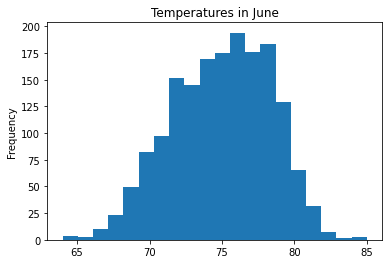

In [8]:
# 5. Return to your challenge instructions to compare your summary statistics
jun_df.plot.hist(bins=20)
plt.legend("", frameon=False)
plt.title("Temperatures in June")
plt.show()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temps_dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
for t in temps_dec:
    print(t)

(76.0,)
(74.0,)
(74.0,)
(64.0,)
(64.0,)
(67.0,)
(77.0,)
(66.0,)
(69.0,)
(68.0,)
(68.0,)
(71.0,)
(74.0,)
(67.0,)
(66.0,)
(69.0,)
(71.0,)
(70.0,)
(70.0,)
(74.0,)
(74.0,)
(71.0,)
(75.0,)
(75.0,)
(72.0,)
(69.0,)
(68.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(73.0,)
(73.0,)
(71.0,)
(73.0,)
(73.0,)
(77.0,)
(72.0,)
(71.0,)
(73.0,)
(70.0,)
(73.0,)
(69.0,)
(74.0,)
(72.0,)
(71.0,)
(72.0,)
(72.0,)
(70.0,)
(73.0,)
(73.0,)
(72.0,)
(73.0,)
(73.0,)
(72.0,)
(63.0,)
(65.0,)
(71.0,)
(76.0,)
(70.0,)
(76.0,)
(69.0,)
(69.0,)
(69.0,)
(74.0,)
(76.0,)
(74.0,)
(73.0,)
(73.0,)
(74.0,)
(73.0,)
(73.0,)
(73.0,)
(74.0,)
(74.0,)
(71.0,)
(73.0,)
(72.0,)
(64.0,)
(66.0,)
(73.0,)
(72.0,)
(65.0,)
(64.0,)
(69.0,)
(68.0,)
(77.0,)
(71.0,)
(71.0,)
(69.0,)
(68.0,)
(68.0,)
(69.0,)
(70.0,)
(72.0,)
(76.0,)
(75.0,)
(69.0,)
(71.0,)
(71.0,)
(71.0,)
(68.0,)
(65.0,)
(70.0,)
(69.0,)
(69.0,)
(71.0,)
(67.0,)
(73.0,)
(74.0,)
(73.0,)
(67.0,)
(74.0,)
(75.0,)
(75.0,)
(74.0,)
(67.0,)
(73.0,)
(73.0,)
(71.0,)
(72.0,)
(71.0,)
(68.0,)
(65.0,)
(69.0,)


In [10]:
# 7. Convert the December temperatures to a list.
temps_dec_list = list(temps_dec)
print (temps_dec_list)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(temps_dec_list, columns=['december_temperature'])
dec_df.head()

,december_temperature
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,december_temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


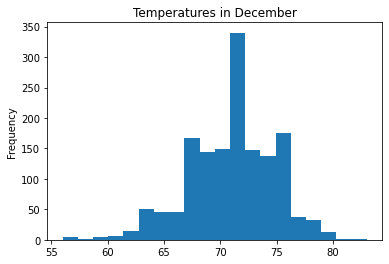

In [13]:
# 10. Return to your challenge instructions to compare your summary statistics
dec_df.plot.hist(bins=20)
plt.legend("", frameon=False)
plt.title("Temperatures in December")
plt.show()